In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
  Using cached ruamel.yaml-0.17.21-py3-none-any.whl (109 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
deeplabcut 2.1.6.2 requires h5py~=2.7, but you have h5py 3.6.0 which is incompatible.
deeplabcut 2.1.6.2 requires matplotlib==3.0.3, but you have matplotlib 3.1.1 which is incompatible.
deeplabcut 2.1.6.2 requires numpy==1.16.4, but you have numpy 1.21.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

In [4]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [5]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(100)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878358326,CAM2P.4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,448900,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,136.0,Slc17a7-IRES2-Cre,GCaMP6s,6.0,...,863992815,VisualBehavior,175,VISp,2019-05-30 17:29:35.000000,OPHYS_6_images_B,Novel >1,False,B,879255318
939327156,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,180.0,Slc17a7-IRES2-Cre,GCaMP6f,1.0,...,930022332,VisualBehavior,175,VISp,2019-09-04 15:26:03.000000,OPHYS_1_images_A,Familiar,False,A,939486362
940354166,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,181.0,Slc17a7-IRES2-Cre,GCaMP6f,2.0,...,930022332,VisualBehavior,175,VISp,2019-09-05 15:43:21.000000,OPHYS_2_images_A_passive,Familiar,True,A,940418592


### Males, Inhibitory, VISp, passive familiar

In [15]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514
1081832027,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546819,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,183.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1080284671,VisualBehavior,275,VISp,2021-02-05 22:18:01.000000,OPHYS_2_images_A_passive,Familiar,True,A,1120143039
1043218895,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,524274,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1039579201,VisualBehavior,275,VISp,2020-08-14 17:53:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1044397946
867410509,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028429,VisualBehaviorMultiscope,225,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397924
867410516,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028423,VisualBehaviorMultiscope,75,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397946


### Females, Inhibitory, VISp, passive familiar

In [16]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012793
956903375,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,150.0,Sst-IRES-Cre,GCaMP6f,2.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-09-26 17:34:33.000000,OPHYS_2_images_B_passive,Familiar,True,B,957356891
798404219,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,156.0,Vip-IRES-Cre,GCaMP6f,2.0,...,791352433,VisualBehavior,175,VISp,2018-12-18 23:26:29.000000,OPHYS_2_images_A_passive,Familiar,True,A,859888258
1066177684,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,538219,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,167.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1064333290,VisualBehavior,175,VISp,2020-11-25 16:08:44.000000,OPHYS_2_images_A_passive,Familiar,True,A,1066218438
1053774037,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,523927,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,198.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1051327176,VisualBehavior,175,VISp,2020-09-30 17:24:54.000000,OPHYS_2_images_A_passive,Familiar,True,A,1053806242
1052412559,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,528097,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,168.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1052096554,VisualBehaviorMultiscope,152,VISp,2020-09-23 13:02:03.191894,OPHYS_2_images_A_passive,Familiar,True,A,1086012409
943134119,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,468866,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,146.0,Vip-IRES-Cre,GCaMP6f,2.0,...,929913236,VisualBehavior,175,VISp,2019-09-10 17:57:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,944214327
993590480,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,128.0,Vip-IRES-Cre,GCaMP6f,2.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-10 19:59:47.000000,OPHYS_2_images_B_passive,Familiar,True,B,993635143


### Males, Inhibitory, VISp, passive novel

In [17]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,Sst-IRES-Cre,GCaMP6f,5.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995659072
993593393,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,5.0,...,989461845,VisualBehaviorTask1B,275,VISp,2019-12-10 17:38:29.000000,OPHYS_5_images_A_passive,Novel >1,True,A,993634306
982862427,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,165.0,Sst-IRES-Cre,GCaMP6f,5.0,...,975371413,VisualBehaviorTask1B,275,VISp,2019-11-14 20:10:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,982976718
1012112426,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,498972,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,152.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1006386845,VisualBehaviorTask1B,275,VISp,2020-03-03 18:24:50.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1012177053
1003456269,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489056,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,Sst-IRES-Cre,GCaMP6f,6.0,...,999191979,VisualBehaviorTask1B,275,VISp,2020-01-28 19:38:04.000000,OPHYS_5_images_A_passive,Novel >1,False,A,1003552807
990381322,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,480753,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,5.0,...,978206330,VisualBehaviorTask1B,275,VISp,2019-11-25 16:47:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,990431717
965930965,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,181.0,Sst-IRES-Cre,GCaMP6f,5.0,...,957024596,VisualBehavior,290,VISp,2019-10-11 19:10:15.000000,OPHYS_5_images_B_passive,Novel >1,True,B,966777641
1051989532,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,127.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1049224697,VisualBehavior,275,VISp,2020-09-21 18:19:24.000000,OPHYS_5_images_B_passive,Novel >1,True,B,1052030734
1082434498,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,187.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1079027842,VisualBehaviorMultiscope,232,VISp,2021-02-08 08:59:10.254858,OPHYS_5_images_B_passive,Novel >1,True,B,1120144551


### Females, Inhibitory, VISp, passive novel

In [18]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
960351917,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,156.0,Sst-IRES-Cre,GCaMP6f,5.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-10-02 18:23:56.000000,OPHYS_5_images_A_passive,Novel >1,True,A,960425985
959388790,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012436
959388792,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012475
959388788,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012491
994053909,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,130.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-12 17:15:46.000000,OPHYS_5_images_A_passive,Novel >1,True,A,994100291
994956406,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,135.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-17 17:04:36.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995001686
1006813726,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,492395,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,174.0,Vip-IRES-Cre,GCaMP6f,5.0,...,1000740620,VisualBehaviorTask1B,175,VISp,2020-02-12 21:26:58.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1006855146
796108483,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,153.0,Vip-IRES-Cre,GCaMP6f,5.0,...,791352433,VisualBehavior,175,VISp,2018-12-15 20:56:37.000000,OPHYS_5_images_B_passive,Novel >1,True,B,859888310
1069286458,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,544261,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,142.0,Vip-IRES-Cre,GCaMP6f,5.0,...,1064333322,VisualBehavior,175,VISp,2020-12-09 21:54:37.000000,OPHYS_5_images_B_passive,Novel >1,True,B,1069316918


In [37]:
ophys_container_idmf = plsmalesf.ophys_container_id.unique()[1]
print(ophys_container_idmf)

1049224697


In [38]:
okay = plsmalesf[plsmalesf.ophys_container_id==ophys_container_idmf]
okay

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175


In [48]:
ophys_session_idmf = plsmalesf.index.values[0]
ophys_session_idmf

961283857

In [54]:
ophys_experiment_idsmf = []

for i in range(len(plsmalesf)):
    ophys_experiment_id = plsmalesf.index.values[i]
    ophys_experiment_idsmf.append(ophys_experiment_id)

print(ophys_experiment_idsmf)

[961283857, 1050720434, 1081264133, 1081264129, 1007929142, 1081832027, 1043218895, 867410509, 867410516, 867410512, 977247468, 977247466, 851093285, 851093287, 851093289, 857698006, 1083518258, 994053903, 992572516, 980673831, 1010530054, 1001535125, 984551228, 836911939, 1049610116, 1049610120, 939471245, 939471248, 939471272, 939471278, 939471269, 881949070, 881949066, 881949068, 881949073, 947798775, 947798771, 947798777, 875564370, 875564398, 875564401, 917820362, 917820370, 917820358, 809497730, 933338719, 967008454, 932372699, 932372701, 932372705, 963394081]


behavior_ophys_experiment_963394081.nwb:   0%|          | 0.00/273M [00:00<?, ?MB/s]

PermissionError: [Errno 13] Permission denied: '/overflow/NSCI274/projects/ophysdata/visual-behavior-ophys-1.0.1/behavior_ophys_experiments/behavior_ophys_experiment_963394081.nwb'

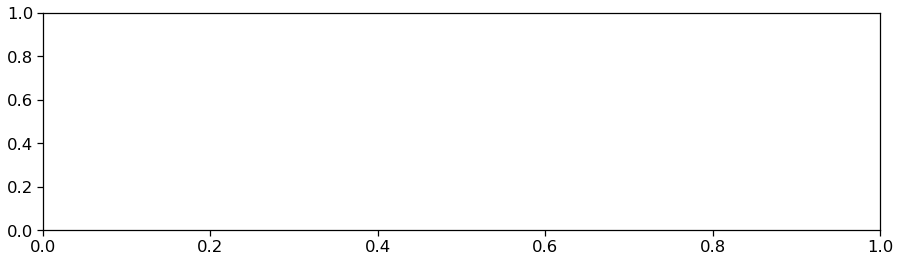

In [59]:
fig, ax = plt.subplots(1,1, figsize=(15,4))
# enumerate over experiments in this session
for i, ophys_experiments in enumerate(ophys_experiment_idsmf): 
    # get the dataset object
    dataset = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)
    # get ophys timestamps
    ophys_timestamps = dataset.ophys_timestamps
    # get the population average dF/F trace
    dff_traces = dataset.dff_traces
    # dff_traces is a dataframe with a column 'dff'
    # get the values of this column and turn into a matrix of n_cells x timepoints
    dff_traces = np.vstack(dff_traces.dff.values)
    # take the mean over the cell axis
    average_dFF = np.mean(dff_traces, axis=0)
    # get the imaging_depth and targeted_structure for this experiment
    # plot it, including the imaging_depth and targeted_structure in the legend label
    ax.plot(ophys_timestamps, average_dFF, label=targeted_structure+'_'+str(imaging_depth))
    ax.set_title("Average Male Inhibitory Neuronal Activity Passively Viewing Familiar Images")
ax.set_ylabel('dF/F')
ax.set_xlabel('time (seconds)')
ax.set_xlim(5*60, 10*60)
ax.legend()